In [1]:
import keras
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Using TensorFlow backend.


In [2]:
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [3]:
cross1=pd.read_csv('oasis_longitudinal.csv')
cross1 = cross1.fillna(method='ffill')
#cross2=pd.read_csv('oasis_cross-sectional.csv')
#cross2 = cross2.fillna(method='ffill')
print (cross1.head())
#print (cross2.head())
print (cross1.info())
#print (cross2.info())

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  2.0  23.0  0.5  1678  0.736  1.046  
3  2.0  28.0  0.5  1738  0.713  1.010  
4  2.0  22.0  0.5  1698  0.701  1.034  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64


In [4]:
print(cross1['Subject ID'])

0      OAS2_0001
1      OAS2_0001
2      OAS2_0002
3      OAS2_0002
4      OAS2_0002
5      OAS2_0004
6      OAS2_0004
7      OAS2_0005
8      OAS2_0005
9      OAS2_0005
10     OAS2_0007
11     OAS2_0007
12     OAS2_0007
13     OAS2_0008
14     OAS2_0008
15     OAS2_0009
16     OAS2_0009
17     OAS2_0010
18     OAS2_0010
19     OAS2_0012
20     OAS2_0012
21     OAS2_0012
22     OAS2_0013
23     OAS2_0013
24     OAS2_0013
25     OAS2_0014
26     OAS2_0014
27     OAS2_0016
28     OAS2_0016
29     OAS2_0017
         ...    
343    OAS2_0175
344    OAS2_0175
345    OAS2_0175
346    OAS2_0176
347    OAS2_0176
348    OAS2_0176
349    OAS2_0177
350    OAS2_0177
351    OAS2_0178
352    OAS2_0178
353    OAS2_0178
354    OAS2_0179
355    OAS2_0179
356    OAS2_0181
357    OAS2_0181
358    OAS2_0181
359    OAS2_0182
360    OAS2_0182
361    OAS2_0183
362    OAS2_0183
363    OAS2_0183
364    OAS2_0183
365    OAS2_0184
366    OAS2_0184
367    OAS2_0185
368    OAS2_0185
369    OAS2_0185
370    OAS2_01

Enter the Subject ID: OAS2_0181
CDR Mean:  0.8333333333333334
MMSE mean:  26.0
CDR standard deviation:  0.28867513459481287
MMSE standard deviation:  0.0


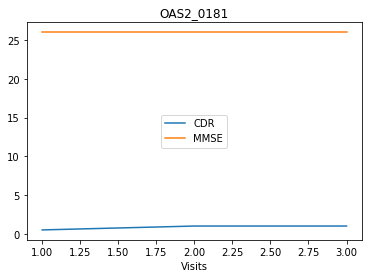

General preventive measures
----------------------------
 
1. Regular exercise : 
i. Aim for at least 150 minutes of moderate intensity exercise each week. 
ii. Build muscle to pump up your brain. For those over 65, adding 2-3 strength sessions to your weekly routine may cut your risk of Alzheimer’s in half.
iii. Include balance and coordination exercises. Balance and coordination exercises can help you stay agile and avoid spills. Try yoga, Tai Chi, or exercises using balance balls.

2. Social engagement
i. Volunteer
ii. Join a club or social group
iii. Visit your local community center or senior center
iv. Take group classes (such as at the gym or a community college)
v. Reach out over the phone or email
vi. Connect to others via social networks such as Facebook
vii. Get to know your neighbors
viii. Make a weekly date with friends
ix. Get out (go to the movies, the park, museums, and other public places)

3. Healthy diet
i. Cut down on sugar.
ii. Enjoy a Mediterranean diet.
iii. Avoi

In [26]:
id = input("Enter the Subject ID: ")
df = cross1[cross1['Subject ID'] == id]
if df.empty:
    print("Invalid ID")
if df.empty == False:
    print("CDR Mean: ",df['CDR'].mean())
    print("MMSE mean: ",df['MMSE'].mean())
    print("CDR standard deviation: ",df['CDR'].std())
    print("MMSE standard deviation: ",df['MMSE'].std())
    plt.plot(df['Visit'],df['CDR'])
    plt.plot(df['Visit'], df['MMSE'])
    plt.xlabel('Visits')
    plt.title(id)
    plt.legend(['CDR','MMSE'], loc = 'center')
    plt.show()
    print("General preventive measures")
    print("----------------------------")
    print(" ")
    f1 = open('preventive_measures_non_pharma.txt',"r")
    print(f1.read())
    if df['CDR'].iloc[-1] >= 0.5:
        f2 = open('severe_pharma.txt',"r")
        print("Preventive meausres for severe stage AD")
        print("-----------------------------------------")
        print(f2.read())
    elif df['CDR'].iloc[-1] < 0.5:
        f3 = open('pharma_moderate_early.txt',"r")
        print(" ")
        print("Preventive meausres for mild/early stage AD")
        print("-----------------------------------------")
        print(f3.read())